## Accuracy, Precision, Recall, True Positive Rate (TPR), and False Positive Rate (FPR), F-score

### Confusion Matrix

|                 | Predicted Positive | Predicted Negative |
| --------------- | ------------------ | ------------------ |
| **Actual Positive** | TP                | FN                  |
| **Actual Negative** | FP                 | TN                |

Each cell in the confusion matrix represents an evaluation factor. Let's understand these factors one by one:

- **True Positive (TP):** Indicates how many positive class samples your model predicted correctly.

- **True Negative (TN):** Signifies how many negative class samples your model predicted correctly.

- **False Positive (FP):** Reflects how many negative class samples your model predicted incorrectly (Type-I error). The position of this error in the confusion matrix depends on the chosen null hypothesis.

- **False Negative (FN):** Represents how many positive class samples your model predicted incorrectly (Type-II error). The position of this error in the confusion matrix also depends on the chosen null hypothesis.


### Accuracy

Accuracy is a fundamental metric that measures the overall correctness of predictions made by a classification model. It is defined as the ratio of correctly predicted instances (both true positives and true negatives) to the total number of instances:

$$ \text{Accuracy} = \frac{\text{TP} + \text{TN}}{\text{Total Instances}} $$

High accuracy indicates a model's ability to make correct predictions across both positive and negative classes.

### Precision
Precision, also known as positive predictive value, is a metric that measures the accuracy of positive predictions made by a classification model. It is defined as the ratio of true positive predictions to the total number of positive predictions (true positives and false positives):

$$ \text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}} $$

The precision metric primarily addresses Type-I errors (FP). Type-I errors occur when a true null hypothesis (H⁰) is incorrectly rejected. Meaning that Negative instance labeled as Positive resulting in FP.

High precision indicates a low false-positive rate, meaning that when the model predicts a positive outcome, it is likely to be correct.

However, precision does not capture Type-II errors, specifically false negatives.

### Recall/Sensitivity/Hit-Rate
Recall, also known as sensitivity or true positive rate (TPR), measures the ability of a model to capture all relevant instances of a positive class. It is defined as the ratio of true positive predictions to the total number of actual positive instances (true positives and false negatives):

$$ \text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}} $$

The recall metric focuses on type-II errors (FN). A type-II error occurs when we accept a false null hypothesis (H⁰). So, in this case, type-II error is when a Positive instance is labeled as Negative, resulting in FN.

A low recall score (<0.5) means your classifier has a high number of false negatives, which can be an outcome of an imbalanced class or untuned model hyperparameters. In an imbalanced class problem, you have to prepare your data beforehand with over/under-sampling or use weighted loss.

High recall indicates a low false-negative rate, meaning that the model is effective at identifying positive instances.

What it cannot measure is the existence of type-I error, which is false positives.

### True Positive Rate (TPR)
True Positive Rate, also known as sensitivity or recall, is the ratio of true positive predictions to the total number of actual positive instances. TPR is expressed as a percentage and represents the model's ability to correctly identify positive instances:

$$ \text{TPR} = \frac{\text{TP}}{\text{TP} + \text{FN}} \times 100 $$

### False Positive Rate (FPR)
False Positive Rate is the ratio of false positive predictions to the total number of actual negative instances. It is expressed as a percentage and represents the rate of incorrect positive predictions made by the model:

$$ \text{FPR} = \frac{\text{FP}}{\text{FP} + \text{TN}} \times 100 $$

Low FPR indicates a low rate of false positives, which is desirable in many classification tasks.

### $F_\beta$ Score

The F-beta score is a metric that combines precision and recall into a single value, providing a balance between these two important evaluation factors. The formula for calculating the F-beta score is:

$$ F_\beta = (1 + \beta^2) \cdot \frac{\text{Precision} \cdot \text{Recall}}{(\beta^2 \cdot \text{Precision}) + \text{Recall}} $$

where:
- $ \beta $ is a parameter that determines the relative importance of precision and recall. A higher $ \beta $ gives more weight to recall.

#### Components of the F-beta Score

1. **Precision:**
   Precision, denoted as $ \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}} $, measures the accuracy of positive predictions made by a classification model. A high precision indicates a low false-positive rate.

2. **Recall:**
   Recall, denoted as $ \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}} $, measures the ability of a model to capture all relevant instances of a positive class. A high recall indicates a low false-negative rate.

#### Interpretation

- **High F-beta Score:**
  - A high F-beta score indicates a balanced performance between precision and recall.
  - The choice of $ \beta $ influences the emphasis on precision or recall.

- **Low F-beta Score:**
  - A low F-beta score may result from imbalances in precision and recall.

#### Choosing $ \beta $

The selection of $ \beta $ depends on the specific requirements of the problem. If precision is more critical, a higher $ \beta $ value can be chosen (e.g., $ \beta = 2 $ for F2 score). If recall is more critical, a lower $ \beta $ value can be selected (e.g., $ \beta = 0.5 $ for F0.5 score).




## Example:

|                 | Predicted Positive | Predicted Negative |
| --------------- | ------------------ | ------------------ |
| **Actual Positive** | 25                 | 5                  |
| **Actual Negative** | 10                 | 60                 |



### Precision
$$ \text{Precision} = \frac{TP}{TP + FP} = \frac{25}{25 + 10} = \frac{25}{35} \approx 0.71 $$

This indicates that among the instances predicted as positive, approximately 83% are true positives.

### Recall
$$ \text{Recall} = \frac{TP}{TP + FN} = \frac{25}{25 + 5} = \frac{25}{30} \approx 0.83 $$

This indicates that the model captures approximately 71% of the actual positive instances.

### True Positive Rate (TPR)
$$ \text{TPR} = \frac{TP}{TP + FN} = \frac{25}{25 + 5} \times 100 = \frac{25}{30} \times 100 \approx 83\% $$

### False Positive Rate (FPR)
$$ \text{FPR} = \frac{FP}{FP + TN} = \frac{10}{60 + 10} \times 100 = \frac{10}{70} \times 100 \approx 14.3\% $$

These metrics provide insights into the model's performance, emphasizing the trade-off between precision and recall or TPR and FPR, depending on the specific requirements of the classification task.


In [2]:
from scipy import stats
import matplotlib.pyplot as plt 
import numpy as np

def tpr(y_pred: np.ndarray, y_true: np.ndarray, threshold: float) -> float:
    """
    Calculate True Positive Rate (Sensitivity).

    Parameters:
    - y_pred (np.ndarray): Predicted probabilities or scores.
    - y_true (np.ndarray): True binary labels (0 or 1).
    - threshold (float): Decision threshold for classification.

    Returns:
    - float: True Positive Rate (Sensitivity).
    """
    tp = np.where(y_pred > threshold, y_true, 0).sum()
    fn = np.where(y_pred <= threshold, y_true, 0).sum()
    
    return tp / (tp + fn)

def fpr(y_pred: np.ndarray, y_true: np.ndarray, threshold: float) -> float:
    """
    Calculate False Positive Rate.

    Parameters:
    - y_pred (np.ndarray): Predicted probabilities or scores.
    - y_true (np.ndarray): True binary labels (0 or 1).
    - threshold (float): Decision threshold for classification.

    Returns:
    - float: False Positive Rate.
    """
    fp = np.where(y_pred > threshold, 1 - y_true, 0).sum()
    tn = np.where(y_pred <= threshold, 1 - y_true, 0).sum()
    
    return fp / (fp + tn)

def roc(y_pred: np.ndarray, y_true: np.ndarray, n: int = 100) -> tuple:
    """
    Generate ROC curve points.

    Parameters:
    - y_pred (np.ndarray): Predicted probabilities or scores.
    - y_true (np.ndarray): True binary labels (0 or 1).
    - n (int): Number of points on the ROC curve.

    Returns:
    - tuple: True Positive Rates, False Positive Rates, Thresholds.
    """
    tprs = []
    fprs = []
    thr = []
    for threshold in np.linspace(0, 1, n):
        tpr_t = tpr(y_pred, y_true, threshold)
        fpr_t = fpr(y_pred, y_true, threshold)
        tprs.append(tpr_t)
        fprs.append(fpr_t)
        thr.append(threshold)
    return tprs, fprs, thr

def prec_rec(y_pred: np.ndarray, y_true: np.ndarray, n: int = 100) -> tuple:
    """
    Generate Precision-Recall curve points.

    Parameters:
    - y_pred (np.ndarray): Predicted probabilities or scores.
    - y_true (np.ndarray): True binary labels (0 or 1).
    - n (int): Number of points on the Precision-Recall curve.

    Returns:
    - tuple: Precisions, Recalls, Thresholds.
    """
    prec = []
    rec = []
    thr = []
    for threshold in np.linspace(0, 1, n):
        tp = np.where(y_pred > threshold, y_true, 0).sum()
        fp = np.where(y_pred > threshold, 1 - y_true, 0).sum()
        fn = np.where(y_pred <= threshold, y_true, 0).sum()
        if (tp + fp) and (tp + fn):
            prec.append(tp / (tp + fp))
            rec.append(tp / (tp + fn))
            thr.append(threshold)
    return prec, rec, thr

def auc_score(y_pred: np.ndarray, y_true: np.ndarray) -> float:
    """
    Calculate the Area Under the ROC Curve (AUC).

    Parameters:
    - y_pred (np.ndarray): Predicted probabilities or scores.
    - y_true (np.ndarray): True binary labels (0 or 1).

    Returns:
    - float: Area Under the ROC Curve (AUC).
    """
    tprs, fprs, _ = roc(y_pred, y_true)
    tprs = np.array(tprs)
    fprs = np.array(fprs)
    indexes = np.argsort(fprs)
    tprs = tprs[indexes]
    fprs = fprs[indexes]
    n = len(tprs)
    auc_score = 0
    for i in range(1, n):
        auc_score += 0.5 * (tprs[i] + tprs[i-1]) * (fprs[i] - fprs[i-1])
    return auc_score

def generate_scores(overlap_pcnt: float, n_samples: list = [200, 200]) -> tuple:
    """
    Generate synthetic data with specified overlap percentage.

    Parameters:
    - overlap_pcnt (float): Percentage of overlap between classes.
    - n_samples (list): Number of samples for each class.

    Returns:
    - tuple: Synthetic data (X) and corresponding labels (y).
    """
    x_overlap = 0.5
    z = stats.norm.ppf(0.999)
    sigma = (x_overlap - 0.25) / z

    z_a = stats.norm.ppf(1 - overlap_pcnt / 2)
    mu_1 = x_overlap - z_a * sigma 
    mu_2 = x_overlap + z_a * sigma
    tp = stats.norm.rvs(loc=mu_2, scale=sigma, size=n_samples[0])
    y_p = np.ones_like(tp)
    tn = stats.norm.rvs(loc=mu_1, scale=sigma, size=n_samples[1])
    y_n = np.zeros_like(tn)
    x = np.hstack([tp, tn])
    y = np.hstack([y_p, y_n])
    x = np.clip(x, 0, 1)
    return x, y



In [3]:
def plot_all(distances: list, n_samples: list = [500, 500]) -> None:
    """
    Plot ROC curves, score distributions, and Precision-Recall curves for given distances.

    Parameters:
    - distances (list): List of distances for generating synthetic data.
    - n_samples (list): Number of samples for each class in synthetic data.

    Returns:
    - None
    """
    n_plots = len(distances)

    # Create a single subplot for all ROC curves
    plt.figure(figsize=(10, 8))

    for i, dist in enumerate(distances):
        y_pred, y_true = generate_scores(dist, n_samples=n_samples)

        # Separate x values based on y values
        x0 = y_pred[y_true == 0]
        x1 = y_pred[y_true == 1]

        # Create a bar plot with different colors for each category
        plt.subplot(n_plots, 3, i * 3 + 1)
        plt.hist(x0, color='blue', alpha=0.5, label='y=0')
        plt.hist(x1, color='red', alpha=0.5, label='y=1')
        plt.title(f'Distribution of Scores')
        plt.legend(loc="upper right")

        tprs, fprs, thresholds = roc(y_pred, y_true)
        precs, recalls, _ = prec_rec(y_pred, y_true)

        # Plot ROC curve
        plt.subplot(n_plots, 3, i * 3 + 2)
        plt.plot(fprs, tprs, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_score(y_pred, y_true):.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve')
        plt.legend(loc="lower right")
        plt.xlim([-0.01, 1.0])
        plt.ylim([0.0, 1.05])

        # Plot Precision-Recall curve
        plt.subplot(n_plots, 3, i * 3 + 3)
        plt.plot(recalls, precs, color='darkorange', lw=2, label=f'Precision-Recall')
        plt.xlim([-0.01, 1.01])
        plt.ylim([0.0, 1.05])
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title(f'Precision-Recall')
        plt.legend(loc="lower right")

    plt.tight_layout()
    plt.show()


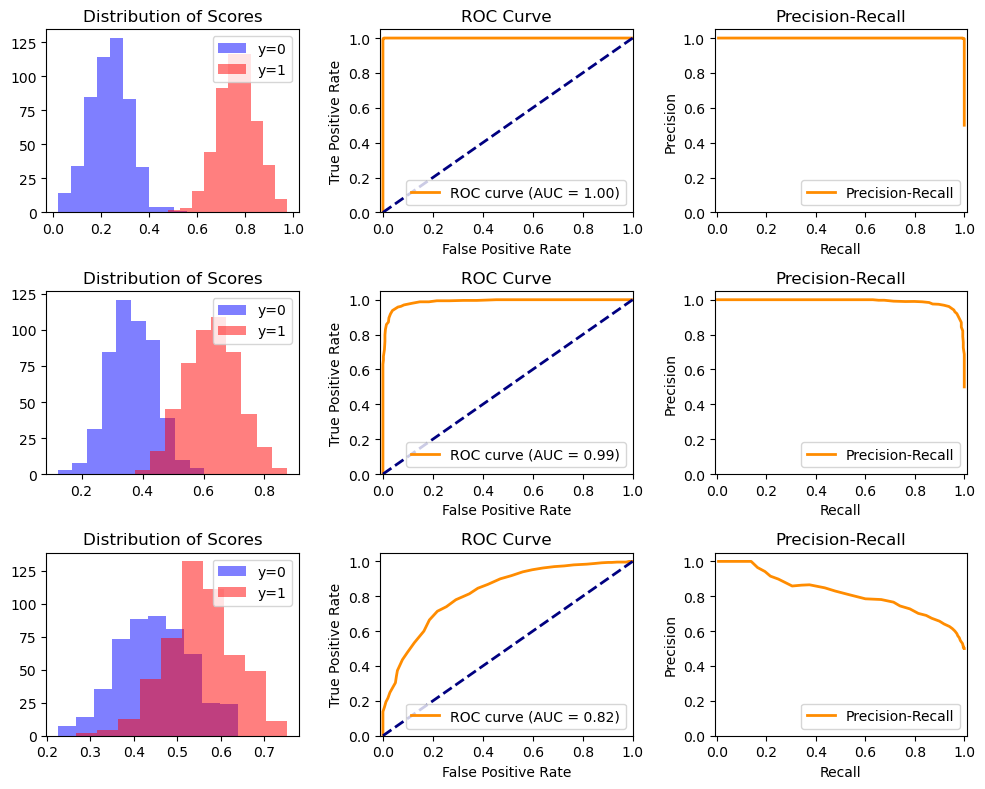

In [4]:
plot_all([0.001, 0.1, 0.5], n_samples=[500, 500])


### For imbalanced classes:

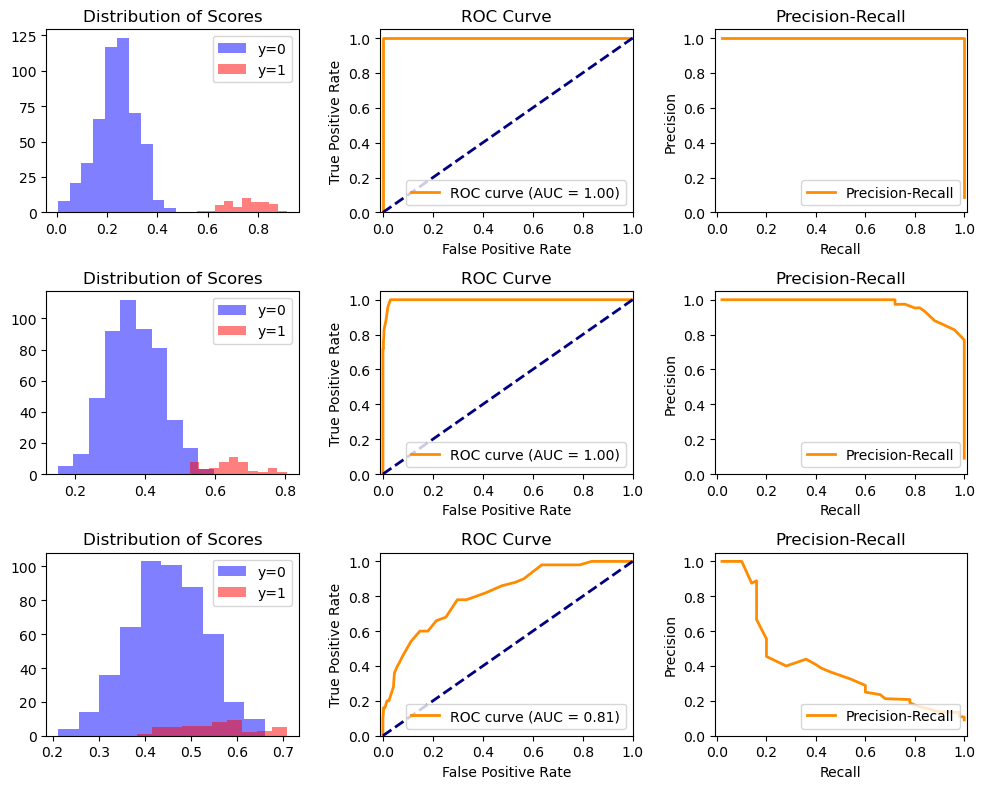

In [5]:
plot_all([0.001, 0.1, 0.5], n_samples=[50, 500])

We observe that when dealing with imbalanced classes, the AUC score may not provide a reliable assessment. Even when the two classes almost overlap, the AUC value remains around 0.81. In such cases, Precision-Recall is a more sensitive metric.

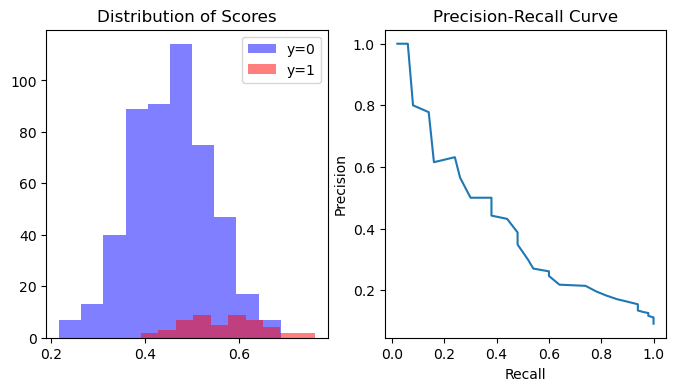

Threshold: 0.000 Precision: 0.091 Recall: 1.000
Threshold: 0.101 Precision: 0.091 Recall: 1.000
Threshold: 0.202 Precision: 0.091 Recall: 1.000
Threshold: 0.303 Precision: 0.093 Recall: 1.000
Threshold: 0.404 Precision: 0.122 Recall: 0.980
Threshold: 0.505 Precision: 0.214 Recall: 0.740
Threshold: 0.606 Precision: 0.500 Recall: 0.380
Threshold: 0.707 Precision: 1.000 Recall: 0.040


In [15]:
y_pred, y_true = generate_scores(0.5, n_samples=[50, 500])

# Separate x values based on y values
x0 = y_pred[y_true == 0]
x1 = y_pred[y_true == 1]

# Create a bar plot with different colors for each category
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.hist(x0, color='blue', alpha=0.5, label='y=0')
plt.hist(x1, color='red', alpha=0.5, label='y=1')
plt.title(f'Distribution of Scores')
plt.legend(loc="upper right")

tprs, fprs, thresholds = roc(y_pred, y_true)
precs, recalls, thresholds = prec_rec(y_pred, y_true)

plt.subplot(1, 2, 2)
plt.plot(recalls, precs)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

for prec, rec, thr in zip(precs[::10], recalls[::10], thresholds[::10]):
    print(f'Threshold: {thr:2.3f} Precision: {prec:2.3f} Recall: {rec:2.3f}')
